In [1]:
import csv
import pandas as pd
from pandas import *
from __future__ import division
from pandas.tseries.offsets import *
import dateutil.rrule as dr
import dateutil.parser as dp
import dateutil.relativedelta as drel
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pybrain
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split
from sklearn import cross_validation
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_fscore_support

In [2]:
pd.options.mode.chained_assignment = None

In [3]:
#kctrain = read_csv('/Users/marco/documents/github/data/kcredit.csv', header=0, usecols=[1,2,3,4,5,6,7,8,9,10,11],)
#kctrain = read_csv('/Users/marco/documents/github/data/kcredit.csv', header=0, usecols=[1,3,4,6,8,10,11],
#                names=['delinquency','age','3059late','income','90late','6089late','dependents'])
#kctest = read_csv('/Users/marco/documents/github/data/kcredittest.csv', header=0, usecols=[3,4,6,8,10,11],
#               names=['age','3059late','90late','income','6089late','dependents'])
kctrain = read_csv('/Users/marco/documents/github/data/kcredit.csv', header=0, usecols=[1,3,4,8,10],
                names=['delinquency','age','late3059','late90','late6089'])
kctest = read_csv('/Users/marco/documents/github/data/kcredittest.csv', header=0, usecols=[3,4,8,10],
               names=['age','late3059','late90','late6089'])

In [4]:
kctrain.head(3)

,delinquency,age,late3059,late90,late6089
0,1,45,2,0,0
1,0,40,0,0,0
2,0,38,1,1,0


In [5]:
kctest.head(3)

,age,late3059,late90,late6089
0,43,0,0,0
1,57,0,0,0
2,59,0,0,0


In [6]:
kctrain.shape

(150000, 5)

In [7]:
kctest.shape

(101503, 4)

In [8]:
kctrain['late3059'][kctrain['late3059'] == 96] = np.nan
kctrain['late3059'][kctrain['late3059'] == 98] = np.nan
kctrain['late6089'][kctrain['late6089'] == 96] = np.nan
kctrain['late6089'][kctrain['late6089'] == 98] = np.nan
kctrain['late90'][kctrain['late90'] == 96] = np.nan
kctrain['late90'][kctrain['late90'] == 98] = np.nan

In [9]:
#kctrain['late3059'][kctrain['late3059'] == 96] = 4
#kctrain['late3059'][kctrain['late3059'] == 98] = 4
#kctrain['late6089'][kctrain['late6089'] == 96] = 4
#kctrain['late6089'][kctrain['late6089'] == 98] = 4
#kctrain['late90'][kctrain['late90'] == 96] = 4
#kctrain['late90'][kctrain['late90'] == 98] = 4

In [10]:
kctest['late3059'][kctest['late3059'] == 96] = 4
kctest['late3059'][kctest['late3059'] == 98] = 4
kctest['late6089'][kctest['late6089'] == 96] = 4
kctest['late6089'][kctest['late6089'] == 98] = 4
kctest['late90'][kctest['late90'] == 96] = 4
kctest['late90'][kctest['late90'] == 98] = 4

In [11]:
#kctrain['dependents'][kctrain['dependents'] > 5] = 6

In [12]:
kctrain['age'][kctrain['age'] < 21] = 20
kctrain['age'][kctrain['age'] > 95] = 95

In [13]:
kctest['age'][kctest['age'] < 21] = 20
kctest['age'][kctest['age'] > 95] = 95

In [14]:
kctrain['late90'][kctrain['late90'] == 96].sum()

0

In [15]:
kctest['late90'][kctest['late90'] == 96].sum()

0

In [16]:
kctrain.isnull().sum()

delinquency      0
age              0
late3059       269
late90         269
late6089       269
dtype: int64

In [17]:
kctest.isnull().sum()

age         0
late3059    0
late90      0
late6089    0
dtype: int64

In [18]:
kctrain.shape

(150000, 5)

In [19]:
kctest.shape

(101503, 4)

In [20]:
#kctrain = kctrain.dropna(thresh=len(kctrain), axis=1)
kctrain = kctrain.dropna()

In [21]:
kctest = kctest.dropna()

In [22]:
kctrain.isnull().sum()

delinquency    0
age            0
late3059       0
late90         0
late6089       0
dtype: int64

In [23]:
kctest.isnull().sum()

age         0
late3059    0
late90      0
late6089    0
dtype: int64

In [24]:
kctrain.shape

(149731, 5)

In [25]:
kctest.shape

(101503, 4)

In [26]:
kctrain['sumlate'] = kctrain.late3059 + kctrain.late6089 + kctrain.late90

In [27]:
kctest['sumlate'] = kctest.late3059 + kctest.late6089 + kctest.late90

In [28]:
ageamp = max(kctrain.age)-min(kctrain.age)
kctrain.age = (ageamp-(kctrain.age-min(kctrain.age)))/ageamp
print min(kctrain.age), max(kctrain.age)

0.0 1.0


In [29]:
ageamp = max(kctest.age)-min(kctest.age)
kctest.age = (ageamp-(kctest.age-min(kctest.age)))/ageamp
print min(kctest.age), max(kctest.age)

0.0 1.0


In [30]:
sumlateamp = max(kctrain.sumlate)-min(kctrain.sumlate)
kctrain.sumlate = (kctrain.sumlate-min(kctrain.sumlate))/sumlateamp
print min(kctrain.sumlate), max(kctrain.sumlate)

0.0 1.0


In [31]:
sumlateamp = max(kctest.sumlate)-min(kctest.sumlate)
kctest.sumlate = (kctest.sumlate-min(kctest.sumlate))/sumlateamp
print min(kctest.sumlate), max(kctest.sumlate)

0.0 1.0


In [32]:
late30amp = max(kctrain.late3059)-min(kctrain.late3059)
kctrain.late3059 = (kctrain.late3059-min(kctrain.late3059))/late30amp
print min(kctrain.late3059), max(kctrain.late3059)

0.0 1.0


In [33]:
late60amp = max(kctrain.late6089)-min(kctrain.late6089)
kctrain.late6089 = (kctrain.late6089-min(kctrain.late6089))/late60amp
print min(kctrain.late6089), max(kctrain.late6089)

0.0 1.0


In [34]:
late90amp = max(kctrain.late90)-min(kctrain.late90)
kctrain.late90 = (kctrain.late90-min(kctrain.late90))/late90amp
print min(kctrain.late90), max(kctrain.late90)

0.0 1.0


In [35]:
#depamp = max(kctrain.dependents)-min(kctrain.dependents)
#kctrain.dependents = (kctrain.dependents-min(kctrain.dependents))/depamp
#print min(kctrain.dependents), max(kctrain.dependents)

In [36]:
kctrain.head(3)

,delinquency,age,late3059,late90,late6089,sumlate
0,1,0.666667,0.153846,0.000000,0,0.105263
1,0,0.733333,0.000000,0.000000,0,0.000000
2,0,0.760000,0.076923,0.058824,0,0.105263


In [37]:
kctest.head(3)

,age,late3059,late90,late6089,sumlate
0,0.702703,0,0,0,0
1,0.513514,0,0,0,0
2,0.486486,0,0,0,0


In [38]:
X = kctrain.drop(['delinquency','late3059','late6089','late90'], 1)
y = kctrain['delinquency']
#X = kctrain.drop('SeriousDlqin2yrs', 1)
#y = kctrain['SeriousDlqin2yrs']
X.head(3)

,age,sumlate
0,0.666667,0.105263
1,0.733333,0.000000
2,0.760000,0.105263


In [39]:
kctest = kctest.drop(['late3059','late6089','late90'], 1)
kctest.head(3)

,age,sumlate
0,0.702703,0
1,0.513514,0
2,0.486486,0


In [40]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.3, random_state=0)

In [41]:
acc_scores = {}
for n in range(20):
    clf = KNeighborsClassifier(n_neighbors=(n+1)).fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc_scores.setdefault((n+1), [])
    acc_scores[(n+1)].append(accuracy_score(y_test, y_pred))

In [42]:
nmax = max(acc_scores, key=acc_scores.get)
#nmax = 19
nmax

18

In [43]:
X_test = X_test.astype(float)
clf = KNeighborsClassifier(n_neighbors = (nmax))
knn_model = clf.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
y_proba_knn = knn_model.predict_proba(X_test)

In [44]:
X_test = X_test.astype(float)
clf = LogisticRegression()
log_model = clf.fit(X_train, y_train)
log_model_all = clf.fit(X, y)
y_pred_log = log_model.predict(X_test)
y_proba_log = log_model.predict_proba(X_test)

In [45]:
X_test = X_test.astype(float)
clf = SVC(probability=True)
svc_model = clf.fit(X_train, y_train)
y_pred_svc = svc_model.predict(X_test)
y_proba_svc = svc_model.predict_proba(X_test)

In [46]:
X_test = X_test.astype(float)
clf = GaussianNB()
gnb_model = clf.fit(X_train, y_train)
y_pred_gnb = gnb_model.predict(X_test)
y_proba_gnb = gnb_model.predict_proba(X_test)

In [47]:
X_test = X_test.astype(float)
clf = DecisionTreeClassifier()
dtc_model = clf.fit(X_train, y_train)
y_pred_dtc = dtc_model.predict(X_test)
y_proba_dtc = dtc_model.predict_proba(X_test)

In [48]:
X_test = X_test.astype(float)
clf = RandomForestClassifier()
rfc_model = clf.fit(X_train, y_train)
rfc_model_all = clf.fit(X, y)
y_pred_rfc = rfc_model.predict(X_test)
y_proba_rfc = rfc_model.predict_proba(X_test)

In [49]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_proba_knn[:,1])
roc_auc_knn = auc(fpr, tpr)
precision_recall_fscore_support(y_test, y_pred_knn, pos_label = None, average = None)

(array([ 0.94213177,  0.55486862]),
 array([ 0.99314269,  0.12290312]),
 array([ 0.96696495,  0.20123318]),
 array([41999,  2921]))

In [50]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_proba_log[:,1])
roc_auc_log = auc(fpr, tpr)
precision_recall_fscore_support(y_test, y_pred_log, pos_label = None, average = None)

(array([ 0.9431669 ,  0.55555556]),
 array([ 0.99219029,  0.14036289]),
 array([ 0.9670577 ,  0.22410495]),
 array([41999,  2921]))

In [51]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_proba_svc[:,1])
roc_auc_svc = auc(fpr, tpr)
precision_recall_fscore_support(y_test, y_pred_svc, pos_label = None, average = None)

(array([ 0.936081  ,  0.67073171]),
 array([ 0.99935713,  0.01882917]),
 array([ 0.96668471,  0.03663004]),
 array([41999,  2921]))

In [52]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_proba_gnb[:,1])
roc_auc_gnb = auc(fpr, tpr)
precision_recall_fscore_support(y_test, y_pred_gnb, pos_label = None, average = None)

(array([ 0.95281984,  0.43577315]),
 array([ 0.97228505,  0.30777131]),
 array([ 0.96245404,  0.36075441]),
 array([41999,  2921]))

In [53]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_proba_dtc[:,1])
roc_auc_dtc = auc(fpr, tpr)
precision_recall_fscore_support(y_test, y_pred_dtc, pos_label = None, average = None)

(array([ 0.941138  ,  0.53713299]),
 array([ 0.9936189 ,  0.10647039]),
 array([ 0.96666667,  0.17771429]),
 array([41999,  2921]))

In [54]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_proba_rfc[:,1])
roc_auc_rfc = auc(fpr, tpr)
precision_recall_fscore_support(y_test, y_pred_rfc, pos_label = None, average = None)

(array([ 0.94348406,  0.62968516]),
 array([ 0.99411891,  0.14378637]),
 array([ 0.96813987,  0.23411371]),
 array([41999,  2921]))

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


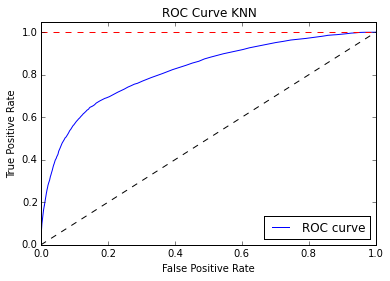

In [55]:
%pylab inline
plt.figure()
plt.plot(fpr, tpr, label='ROC curve' % roc_auc_knn)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0, 1], [1, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve KNN')
plt.legend(loc="lower right")
plt.show()

Populating the interactive namespace from numpy and matplotlib


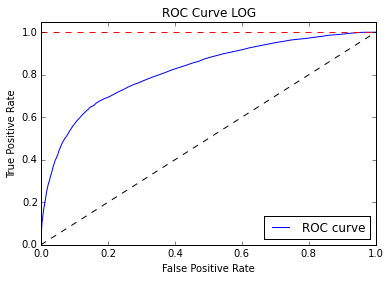

In [56]:
%pylab inline
plt.figure()
plt.plot(fpr, tpr, label='ROC curve' % roc_auc_log)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0, 1], [1, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve LOG')
plt.legend(loc="lower right")
plt.show()

Populating the interactive namespace from numpy and matplotlib


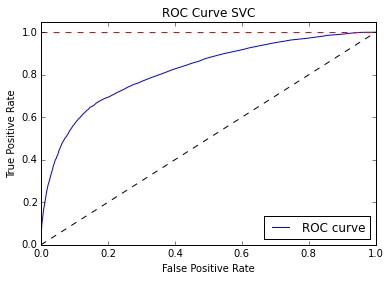

In [57]:
%pylab inline
plt.figure()
plt.plot(fpr, tpr, label='ROC curve' % roc_auc_svc)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0, 1], [1, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve SVC')
plt.legend(loc="lower right")
plt.show()

Populating the interactive namespace from numpy and matplotlib


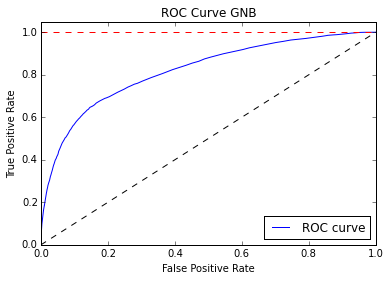

In [58]:
%pylab inline
plt.figure()
plt.plot(fpr, tpr, label='ROC curve' % roc_auc_gnb)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0, 1], [1, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve GNB')
plt.legend(loc="lower right")
plt.show()

Populating the interactive namespace from numpy and matplotlib


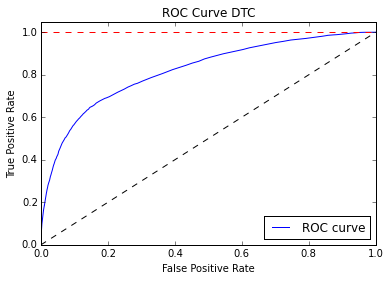

In [59]:
%pylab inline
plt.figure()
plt.plot(fpr, tpr, label='ROC curve' % roc_auc_dtc)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0, 1], [1, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve DTC')
plt.legend(loc="lower right")
plt.show()

Populating the interactive namespace from numpy and matplotlib


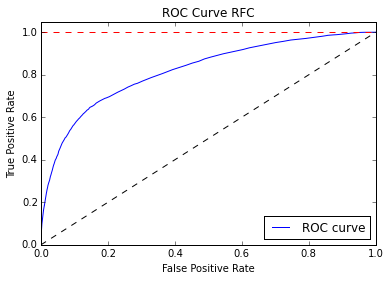

In [60]:
%pylab inline
plt.figure()
plt.plot(fpr, tpr, label='ROC curve' % roc_auc_rfc)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0, 1], [1, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve RFC')
plt.legend(loc="lower right")
plt.show()

In [61]:
accuracy_score(y_test, y_pred_knn)

0.93655387355298303

In [62]:
accuracy_score(y_test, y_pred_log)

0.93679875333926976

In [63]:
accuracy_score(y_test, y_pred_svc)

0.93559661620658952

In [64]:
accuracy_score(y_test, y_pred_gnb)

0.92907390917186106

In [65]:
accuracy_score(y_test, y_pred_dtc)

0.9359305431878896

In [66]:
accuracy_score(y_test, y_pred_rfc)

0.93882457702582367

In [67]:
roc_auc_knn

0.77109059075997788

In [68]:
roc_auc_log

0.81086527393965835

In [69]:
roc_auc_svc

0.58023282030019152

In [70]:
roc_auc_gnb

0.8076094865368203

In [71]:
roc_auc_dtc

0.80747414968773923

In [72]:
roc_auc_rfc

0.81998438788409889

## Outputs dataset for Kaggle submits

In [91]:
Probability = pd.Series(rfc_model_all.predict_proba(kctest)[:,1], name = 'Probability')

In [92]:
len(Probability)

101503

In [93]:
Id = pd.Series(range(1,101504), name = 'Id')

In [94]:
len(Id)

101503

In [95]:
max(Id)

101503

In [96]:
k01 = pd.concat([Id, Probability], axis=1)
k01.head(3)

,Id,Probability
0,1,0.039605
1,2,0.024523
2,3,0.021962


In [97]:
k01.shape

(101503, 2)

In [98]:
k01.to_csv('/Users/marco/documents/github/data/k01.csv', index = False)

## Unsupervised classification, Neural Network (to be revised using pylearn2)

In [99]:
X_test = X_test.astype(float)
net = buildNetwork(2, 3, 1)
trainer = BackpropTrainer(net, )
trainer.train()
net.activate([2, 1])

#clf = RandomForestClassifier()
#rfc_model = clf.fit(X_train, y_train)
y_pred_rfc = rfc_model.predict(X_test)
y_proba_rfc = rfc_model.predict_proba(X_test)

NameError: name 'buildNetwork' is not defined

In [ ]:
X_train[1:3]

In [ ]:
ds = SupervisedDataSet(6,3)

tf = open('mycsvfile.csv','r')

for line in tf.readlines():
    data = [float(x) for x in line.strip().split(',') if x != '']
    indata =  tuple(data[:6])
    outdata = tuple(data[6:])
    ds.addSample(indata,outdata)

n = buildNetwork(ds.indim,8,8,ds.outdim,recurrent=True)
t = BackpropTrainer(n,learningrate=0.01,momentum=0.5,verbose=True)
t.trainOnDataset(ds,1000)
t.testOnData(verbose=True)

In [ ]:
def get_dataset():

    array = numpy.loadtxt('test.csv', delimiter=',', skiprows=1)

    # assume last field in csv is single target variable
    # and all other fields are input variables
    number_of_columns = array.shape[1]
    dataset = SupervisedDataSet(number_of_columns - 1, 1)

    print array[0]
    #print array[:,:-1]
    #print array[:,-1]
    #dataset.addSample(array[:,:-1], array[:,-1])
    #dataset.addSample(array[:,:-1], array[:,-2:-1])
    dataset.setField('input', array[:,:-1])
    dataset.setField('target', array[:,-1:])

    return dataset